# Problem :

IMDB movie review sentiment classification problem. Each movie review is a variable sequence of words and the sentiment of each movie review must be classified. The IMDB Movie Review Dataset contains 25,000 highly-polar movie reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given movie review has a positive or negative sentiment. Keras provides access to the IMDB dataset built-in. The imdb.load_data() function allows you to load the dataset in a format that is ready for use in neural network and deep learning models. The words have been replaced by integers that indicate the ordered frequency of each word in the dataset. The sentences in each review are therefore comprised of a sequence of integers.

# Why CNN with LSTM for text Classifcation

CNNs are generally used in computer vision, however they’ve recently been applied to various NLP tasks and the results were promising.
Let’s briefly see what happens when we use CNN on text data through a diagram.The result of each convolution will fire when a special pattern is detected. By varying the size of the kernels and concatenating their outputs, you’re allowing yourself to detect patterns of multiples sizes (2, 3, or 5 adjacent words).Patterns could be expressions (word ngrams?) like “I hate”, “very good” and therefore CNNs can identify them in the sentence regardless of their position.
Recurrent neural networks can obtain context information but the order of words will lead to bias; the text analysis method based on Convolutional neural network (CNN) can obtain important features of text through pooling but it is difficult to obtain contextual information which can be leverage using LSTM. So using the combination of CNN with LSTM could give us some intresting results

# Develop an text classification model based on CNN + LSTM in Keras.

In this assignment, you will have to train two Text classification:
1) LSTM based Text Classification
2) CNN + LSTM based Text Classification

After training the two different classification, you have to compare the accuracy on both of the model trained and report the best accuracy for which of them.

This notebook is divided into six parts. Total : [8 Marks]

1. Import the required Libraires [1 Mark]
2. Implement the LSTM model [2 Marks]
3. Calculate the LSTM model accuracy [1 Mark]
4. Implement the CNN + LSTM [3 Marks]
5. Calculate the CNN + LSTM model accuracy [1 Mark]

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import imdb

import seaborn as sns
import pandas as pd

#import the required library

# Student will have to code here
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,MaxPooling1D
from keras.layers import LSTM, Flatten, Dropout, Conv1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Students will end their code here

In [2]:
# load the dataset but only keep the top n words, zero the rest
top_words = 10000

import numpy as np

np.load.__defaults__=(None, True, True, 'ASCII')

# call load_data with allow_pickle implicitly set to true
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size = 0.2)
print("Shape of Train Data:", X_train.shape)
print("Shape of Test Data:", X_test.shape)
print("Shape of CV Data:", X_cv.shape)

# truncate and pad input sequences
max_review_length = 600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
X_cv = sequence.pad_sequences(X_cv,maxlen=max_review_length)

Shape of Train Data: (20000,)
Shape of Test Data: (25000,)
Shape of CV Data: (5000,)


In [3]:
y_train[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [4]:
# Decoding the data coded data of IMDB ( Data Understanding )
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X_train[0]] )
print(decoded) 

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # this quasi j horror film followed a young woman as she returns to her childhood village on the island of # to sell the family house and meet up with old friends she finds that one the daughter of the vill

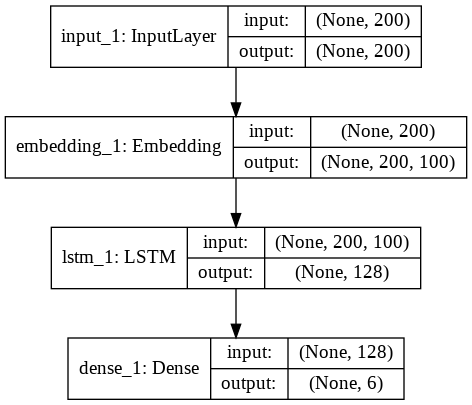

In [5]:
# Architecture Diagram for LSTM Based Classifcation but you will have to change the
# configuration/model parameters while implementing it depending on the input , output and the 
# Problem statement.

from IPython.display import Image
Image(filename='LSTM_model.png')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
313/313 [==============================] - 20s 55ms/step - loss: 0.6351 - accuracy: 0.6819 - val_loss: 0.6497 - val_accuracy: 0.6710
Epoch 2/5
313/313 [==============================] - 17s 53ms/step - loss: 0.5728 - accuracy: 0.7326 - val_loss: 0.4209 - val_accuracy: 0.8162
Epoch 3/5
313/313 [==

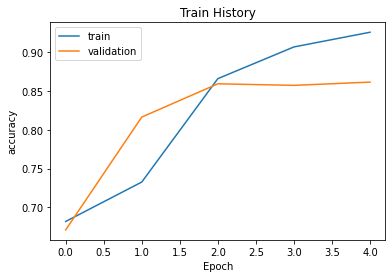

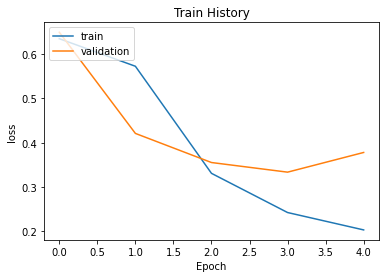

In [6]:
import tensorflow as tf

embedding_vector_length = 32
model = tf.keras.Sequential()

# Write the code for LSTM Based Classifcation
# Embedding layer
# LSTM Layer : You are free to choose the hyperparameters and the number of layers
# Dense Layer

# Students will be starting their code from here:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=top_words, output_dim=embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(units=1, activation='sigmoid'))

# Students will be ending their code here

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Change the number of epochs and the batch size depending on the RAM Size

history=model.fit(X_train, y_train, epochs=5, batch_size=64,verbose = 1,validation_data=(X_cv,y_cv))

def show_training_history(training_history,training,validation):
    plt.plot(training_history.history[training])
    plt.plot(training_history.history[validation])
    plt.title('Train History')
    plt.ylabel(training)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_training_history(history,'accuracy','val_accuracy')
show_training_history(history,'loss','val_loss')

In [7]:
# Final evaluation of the model using test dataset
# Students will be starting their code from here:

scores = model.evaluate(X_test, y_test, verbose=1)
print('Testing Loss \t', scores[0]*100)
print('Testing Accuracy ', scores[1]*100)

782/782 [==============================] - 14s 18ms/step - loss: 0.3894 - accuracy: 0.8556
Testing Loss 	 38.941690325737
Testing Accuracy  85.56399941444397


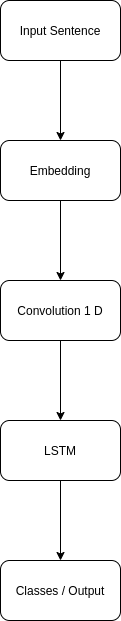

In [8]:
# High Level Model Architecture
from IPython.display import Image
Image(filename='1_VGtBedNuZyX9E-07gnm2Yg.png')

In [9]:
# create the model
embedding_vector_length = 32
cnn_model = Sequential()

# Students will be starting their code from here:

# Write the code for LSTM Based Classifcation
# Embedding layer
# Convolution-1D Layer : You are free to choose the hyperparameters and the number of layers
# LSTM Layer : You are free to choose the hyperparameters and the number of layers
# Dense Layer
cnn_model.add(Embedding(input_dim=top_words, output_dim=embedding_vector_length, input_length=max_review_length))
cnn_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(LSTM(100))
cnn_model.add(Dense(units=1, activation='sigmoid'))

# Students will be ending their code here

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn_model.summary())

# Change the number of epochs and the batch size depending on the RAM Size

cnn_history=cnn_model.fit(X_train, y_train, epochs=5, batch_size=64,verbose = 1,validation_data=(X_cv,y_cv))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 600, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 300, 32)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 376,405
Trainable params: 376,405
Non-trainable params: 0
________________________________________________

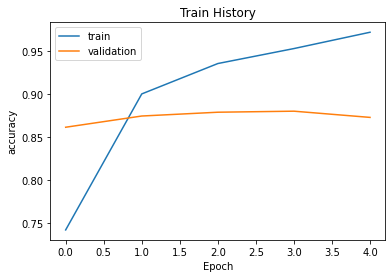

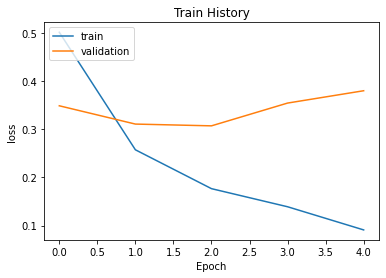

782/782 [==============================] - 9s 11ms/step - loss: 0.4035 - accuracy: 0.8646
Testing Loss 	 40.349388122558594
Testing Accuracy  86.46399974822998


In [10]:
# Final evaluation of the CNN + RNN model using the test data
# Students will be starting their code from here:
show_training_history(cnn_history,'accuracy','val_accuracy')
show_training_history(cnn_history,'loss','val_loss')


cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=1)
print('Testing Loss \t', cnn_scores[0]*100)
print('Testing Accuracy ', cnn_scores[1]*100)

## Comparison of the Models

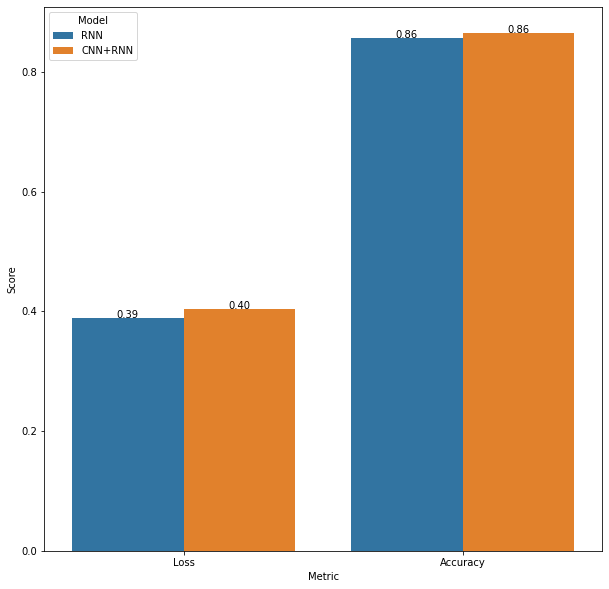

In [11]:
#Creating a function to display values:
def show_values_on_bars(axs, h_v="v", space=0.2):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = "{:.2f}".format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = "{:.2f}".format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
        
#Creating a dataframe to draw out comparisons

results=[]
results.append([scores[0], 'Loss', 'RNN'])
results.append([scores[1], 'Accuracy', 'RNN'])
results.append([cnn_scores[0], 'Loss', 'CNN+RNN'])
results.append([cnn_scores[1], 'Accuracy', 'CNN+RNN'])


comparison = pd.DataFrame(results, columns = ['Score', 'Metric', 'Model'])

plt.figure(figsize=(10,10))
plot = sns.barplot(x=comparison['Metric'],y=comparison['Score'], hue = comparison['Model'])

show_values_on_bars(plot)

## Observation:
The comparison graph depicts that there is some increase in the Loss but there is no noticeable change in Accuracy resulting in minor change in overall Performance when we add a Convulational Layer to the RNN Model.